# Customizing Colorbars

In [14]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('classic')

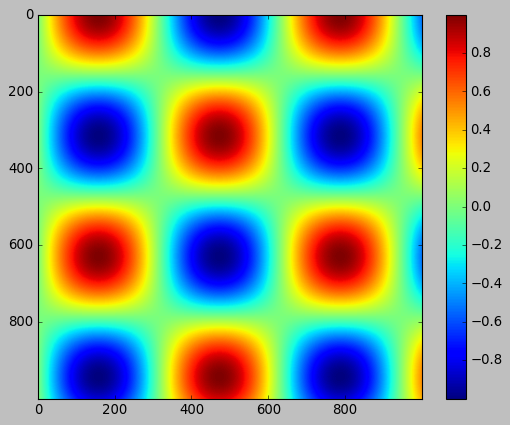

In [15]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])
plt.imshow(I)
plt.colorbar()

## Customizing Colorbars

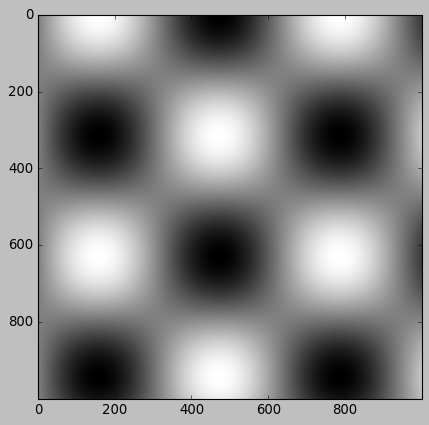

In [16]:
plt.imshow(I,cmap = 'gray')

### Choosing the colormap
- https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833
- https://matplotlib.org/1.4.1/users/colormaps.html

#### Sequential colormaps
These consist of one continuous sequence of colors (e.g., binary or viridis).
#### Divergent colormaps
These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., RdBu or PuOr).
#### Qualitative colormaps
These mix colors with no particular sequence (e.g., rainbow or jet).

In [17]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    fig, ax = plt.subplots(2, figsize=(6, 2),
    subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

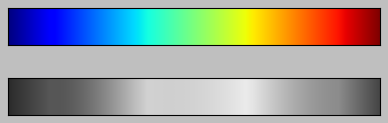

In [18]:
view_colormap('jet')

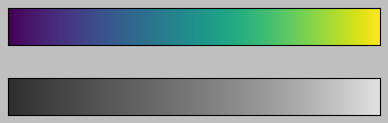

In [19]:
view_colormap('viridis')

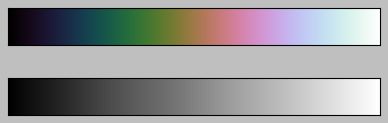

In [20]:
view_colormap('cubehelix')

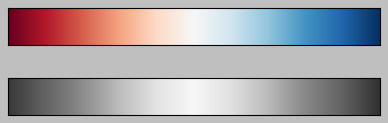

In [21]:
view_colormap('RdBu')

There are a large number of colormaps available in Matplotlib; to see a list of them, you can use IPython to explore the plt.cm submodule.

### Color limits and extensions

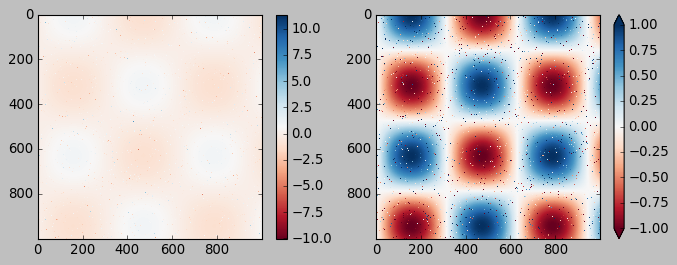

In [22]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

### Discrete colorbars

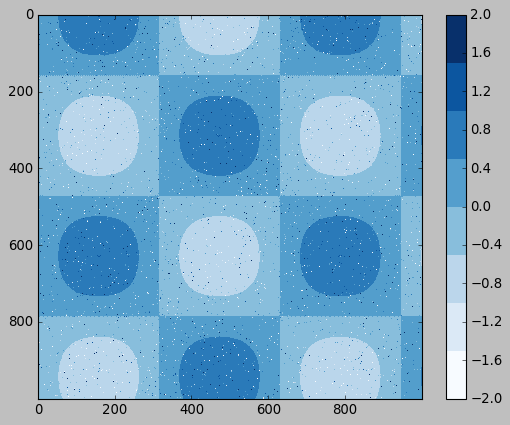

In [23]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 8))
plt.colorbar()
plt.clim(-2, 2);

## Example: Handwritten Digits

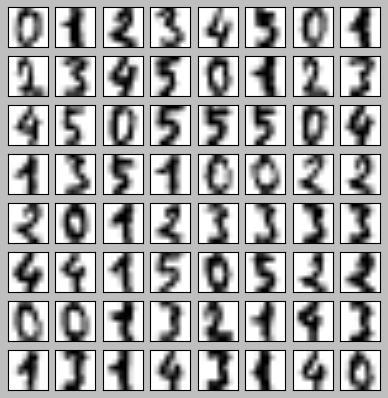

In [24]:
# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits

digits = load_digits(n_class=6)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))

for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [25]:
# project the digits into 2 dimensions using IsoMap

from sklearn.manifold import Isomap

iso = Isomap(n_components = 2)
projection = iso.fit_transform(digits.data)

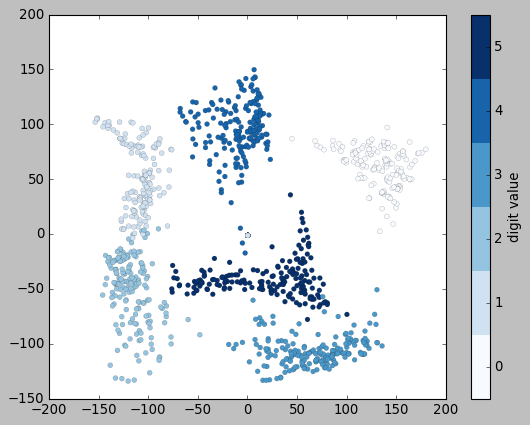

In [26]:
# plot the results

plt.scatter(projection[:, 0], projection[:, 1], lw=0.1, c = digits.target, cmap = plt.cm.get_cmap('Blues', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)